# Google Machinelearing Challenge
#### Team 루프탑

In [1]:
import os
from glob import glob

import pandas as pd # Dataframe
import numpy as np #Linear Algebra
import matplotlib.pyplot as plt #Visualization
%matplotlib inline
from skimage import color, io 
from scipy.misc import imresize 
#from PIL import Image

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
from tflearn.metrics import Accuracy

## EDA
- 개 고양이 사진 분류
- Train set
    - cats : 7,854
    - dogs : 7,872
- Validation
    - cats : 989
    - dogs : 977
- Test set
    - 1,963
   
   
## Data Import

In [2]:
files_path = './data'
cat_files_path = os.path.join(files_path, 'train/cats/*.jpg')
dog_files_path = os.path.join(files_path, 'train/dogs/*.jpg')
cat_val_path = os.path.join(files_path, 'validation/cats/*.jpg')
dog_val_path = os.path.join(files_path, 'validation/dogs/*.jpg')

In [3]:
cat_files = sorted(glob(cat_files_path))
dog_files = sorted(glob(dog_files_path))
train_files = cat_files + dog_files
cat_val = sorted(glob(cat_val_path))
dog_val = sorted(glob(dog_val_path))
val_files = cat_val + dog_val
print(dog_files_path)
print(dog_val_path)

./data/train/dogs/*.jpg
./data/validation/dogs/*.jpg


In [4]:
n_files = len(train_files)
n_val = len(val_files)
print(n_files)
print(n_val)

15724
1964


In [5]:
image_size = 128
X = np.zeros((n_files, image_size, image_size, 3), dtype='float64')
y = np.zeros(n_files)
X_val = np.zeros((n_val, image_size, image_size, 3), dtype='float64')
y_val = np.zeros(n_val)

In [7]:
count = 0
for f in cat_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        X[count] = np.array(new_img)
        y[count] = 0
        count += 1
    except:
        continue

for f in dog_files:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        X[count] = np.array(new_img)
        y[count] = 1
        count += 1
    except:
        continue

/Users/mac/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8589934590 bytes but only got 37573. Skipping tag 34855
  "Skipping tag %s" % (size, len(data), tag))
/Users/mac/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8589934590 bytes but only got 28996. Skipping tag 34855
  "Skipping tag %s" % (size, len(data), tag))
/Users/mac/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
/Users/mac/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2818048 bytes but only got 0. Skipping tag 0
  "Skipping tag %s" % (size, len(data), tag))
/Users/mac/anaconda/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting 

In [7]:
count = 0
for f in cat_val:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        X_val[count] = np.array(new_img)
        y_val[count] = 0
        count += 1
    except:
        continue


for f in dog_val:
    try:
        img = io.imread(f)
        new_img = imresize(img, (image_size, image_size, 3))
        X_val[count] = np.array(new_img)
        y_val[count] = 1
        count += 1
    except:
        continue

In [8]:
perm = np.arange(len(X))
np.random.shuffle(perm)
X = X[perm]
y = y[perm]

In [9]:
perm = np.arange(len(X_val))
np.random.shuffle(perm)
X_val = X_val[perm]
y_val = y_val[perm]

In [10]:
Y = to_categorical(y, 2)
Y_val = to_categorical(y_val, 2)

In [11]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

In [12]:
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

In [13]:
network = input_data(shape=[None, image_size, image_size, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 2, activation='softmax')
acc = Accuracy(name="Accuracy")
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.0005, metric=acc)

In [14]:
# 서버에서 학습시킨 코드
model = tflearn.DNN(network, checkpoint_path='MLCrooftop.tflearn', max_checkpoints = 3,
                    tensorboard_verbose = 3, tensorboard_dir='tmp/tflearn_logs/')

In [16]:
model.fit(X, Y, validation_set=(X_val, Y_val), batch_size=500,
      n_epoch=1, run_id='MLCrooftop', show_metric=True)

Training Step: 31  | total loss: 0.68143 | time: 650.827s
| Adam | epoch: 001 | loss: 0.68143 - Accuracy: 0.5561 -- iter: 15500/15724
Training Step: 32  | total loss: 0.68094 | time: 678.876s
| Adam | epoch: 001 | loss: 0.68094 - Accuracy: 0.5610 | val_loss: 0.67645 - val_acc: 0.5820 -- iter: 15724/15724
--


- 실제 서버에서는 100 epoch 실행

In [17]:
model.save('MLCrooftop_final.tflearn')

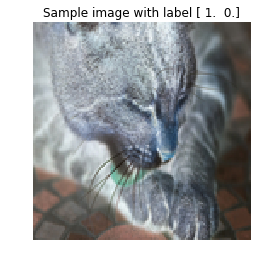

In [18]:
plt.imshow(X[1])
plt.axis('off')
plt.title('Sample image with label {}'.format(Y[1]))
plt.show()

In [19]:
model.predict(X_val[:10])

array([[ 0.42874637,  0.5712536 ],
       [ 0.60955197,  0.390448  ],
       [ 0.52209407,  0.47790587],
       [ 0.53380615,  0.46619383],
       [ 0.50968468,  0.49031526],
       [ 0.49538428,  0.50461572],
       [ 0.56830901,  0.43169096],
       [ 0.50978982,  0.49021012],
       [ 0.43235639,  0.56764364],
       [ 0.48608565,  0.51391435]], dtype=float32)